# Vehicle Detection and Tracking
---
*Term 1, Project 5 of Udacity Self-Driving Car Nanodegree, by vuiseng9, Sept 2017*

In [2]:
# helper_functions.py contains 
# most functions required in this project
# and most of them adapted from tutorials
from helper_functions import *
from time import time
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Dataset

Referenced through the project suite, the dataset used in this project are comprised of images taken from the [GTI vehicle image database](http://www.gti.ssr.upm.es/data/Vehicle_database.html) and [KITTI vision benchmark suite](http://www.cvlibs.net/datasets/kitti/).

In [5]:
# grab list of files for positive and negative class
vh = glob.glob("./kitti_gti_dataset/vehicles/*/*.png")
x_vh = glob.glob("./kitti_gti_dataset/non-vehicles/*/*.png")

In [4]:
# Take a peek into the data
data_look(vh,x_vh)

{'data_type': dtype('uint8'),
 'image_shape': (64, 64, 3),
 'n_cars': 8792,
 'n_notcars': 8968}

#### Visualization of Dataset

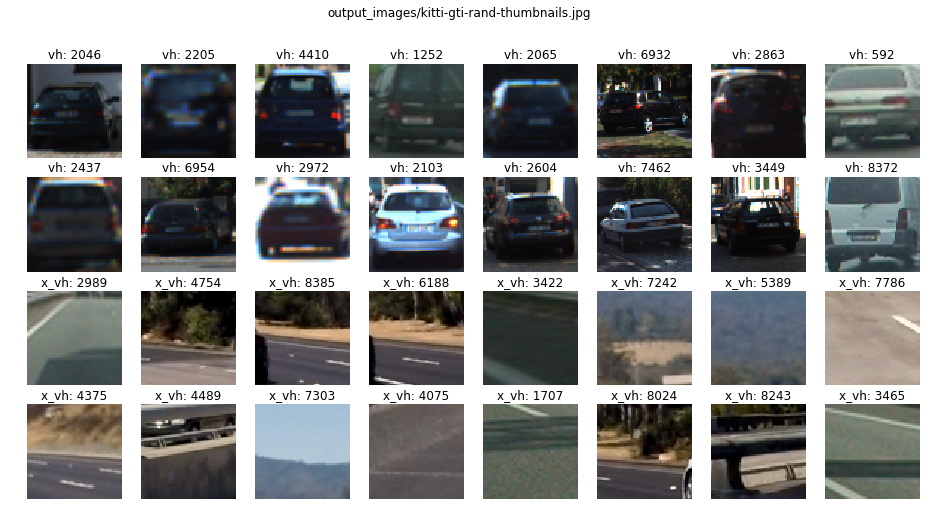

In [16]:
# Random Data Visualization 

# random selection of indices of vehicle and non-vehicle for plottin
vh_idxes = np.random.choice(range(0,len(vh)), int(rows*cols/2), replace=False)
x_vh_idxes = np.random.choice(range(0,len(x_vh)), int(rows*cols/2), replace=False)

# set up canvas and axes
rows = 4; cols = 8
f, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

# offset for plotting non-vehicles
row_offset = int(rows/2)

# plotting vehicle images
for i, idx in enumerate(vh_idxes):
    r = int(i/cols); c = i%cols
    ax[r,c].imshow(plt.imread(vh[idx]))
    ax[r,c].axis('off')
    ax[r,c].set_title('vh: ' + str(idx))

# plotting non-vehicle images
for i, idx in enumerate(x_vh_idxes):
    r = int(i/cols) + row_offset; c = i%cols
    ax[r,c].imshow(plt.imread(x_vh[idx]))
    ax[r,c].axis('off')
    ax[r,c].set_title('x_vh: ' + str(idx))
    
# save figure
imgpth = 'output_images/kitti-gti-rand-thumbnails.jpg'
f.suptitle(imgpth)
# f.tight_layout()
# f.subplots_adjust(top=0.95)
f.savefig(imgpth)

## Feature Explorations

#### Color Space Transform

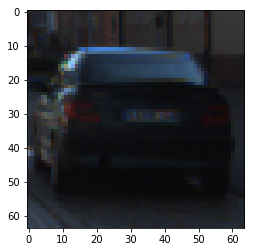

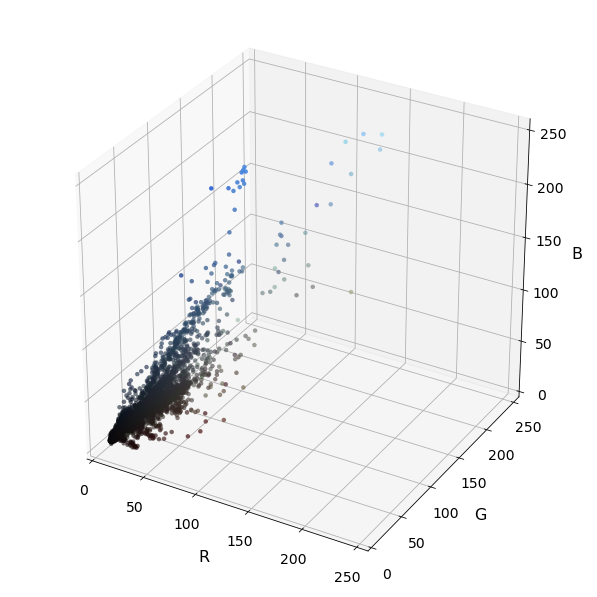

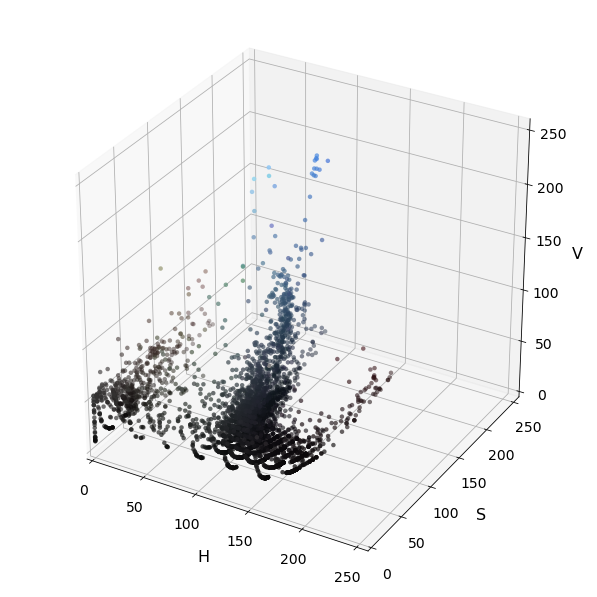

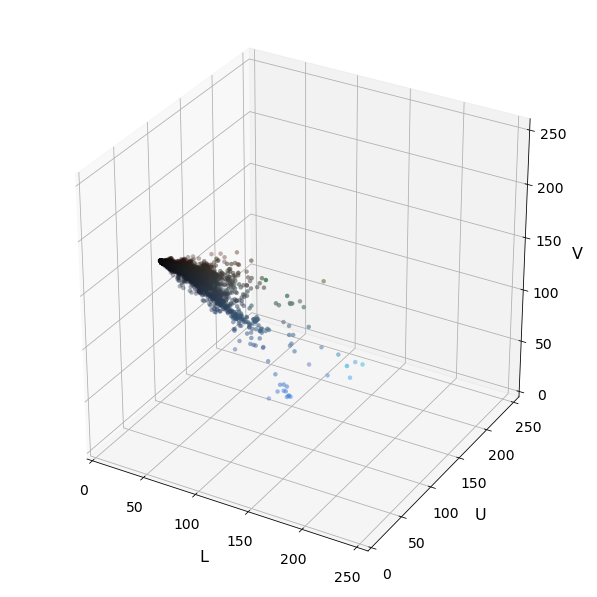

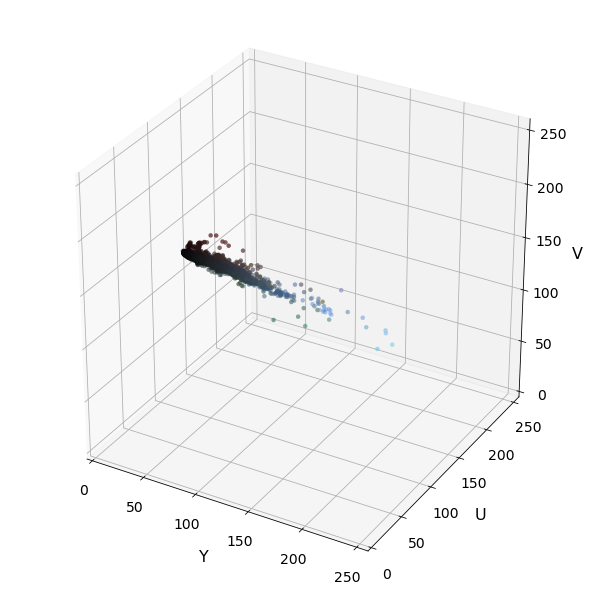

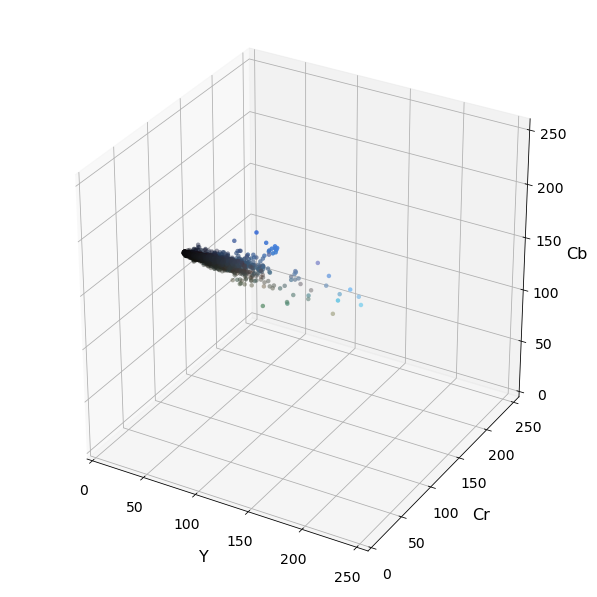

In [19]:
# Read a color image
img = cv2.imread(np.random.choice(vh))

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = convert_color(img_small, color_space='RGB') 
img_small_HSV = convert_color(img_small, color_space='HSV')
img_small_LUV = convert_color(img_small, color_space='LUV')
img_small_YUV = convert_color(img_small, color_space='YUV')
img_small_YCrCb = convert_color(img_small, color_space='YCrCb')

img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# RGB convention correction
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=["Y","Cr","Cb"])
plt.show()


### Color Histogram

./kitti_gti_dataset/vehicles/KITTI_extracted/5928.png


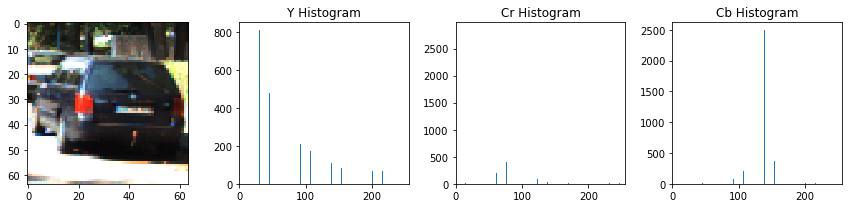

In [121]:
# Read a color image
vh_id = np.random.choice(vh)
img = cv2.imread(vh_id)
print(vh_id)

# extracting color histogram features and thier bin centers
bincen, hist_features = color_hist(convert_color(img, color_space='YCrCb'), nbins=16)

# Plot a figure with all three bar charts
nfeatures_per_channel = hist_features.shape[0]//3

fig = plt.figure(figsize=(12,3))
plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(142)
plt.bar(bincen, hist_features[0:nfeatures_per_channel])
plt.xlim(0, 256)
plt.title('Y Histogram')
plt.subplot(143)
plt.bar(bincen, hist_features[nfeatures_per_channel:nfeatures_per_channel*2])
plt.xlim(0, 256)
plt.title('Cr Histogram')
plt.subplot(144)
plt.bar(bincen, hist_features[nfeatures_per_channel*2:])
plt.xlim(0, 256)
plt.title('Cb Histogram')
fig.tight_layout()

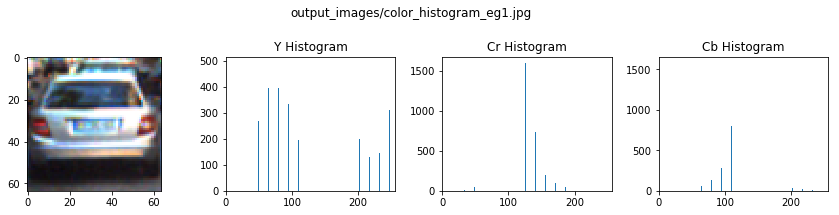

In [116]:
img = cv2.imread('./kitti_gti_dataset/vehicles/KITTI_extracted/224.png')

# extracting color histogram features and thier bin centers
bincen, hist_features = color_hist(convert_color(img, color_space='YCrCb'), nbins=16)

# Plot a figure with all three bar charts
nfeatures_per_channel = hist_features.shape[0]//3

fig = plt.figure(figsize=(12,3))
plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(142)
plt.bar(bincen, hist_features[0:nfeatures_per_channel])
plt.xlim(0, 256)
plt.title('Y Histogram')
plt.subplot(143)
plt.bar(bincen, hist_features[nfeatures_per_channel:nfeatures_per_channel*2])
plt.xlim(0, 256)
plt.title('Cr Histogram')
plt.subplot(144)
plt.bar(bincen, hist_features[nfeatures_per_channel*2:])
plt.xlim(0, 256)
plt.title('Cb Histogram')
fig.tight_layout()

# save figure
imgpth = 'output_images/color_histogram_eg1.jpg'
plt.suptitle(imgpth)
plt.subplots_adjust(top=0.75)
plt.savefig(imgpth)

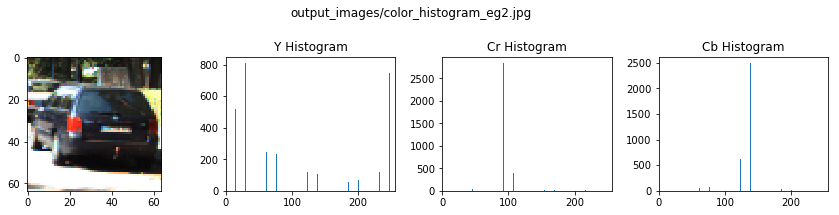

In [122]:
img = cv2.imread('./kitti_gti_dataset/vehicles/KITTI_extracted/5928.png')

bincen, hist_features = color_hist(convert_color(img, color_space='YCrCb'), nbins=16)

# Plot a figure with all three bar charts
nfeatures_per_channel = hist_features.shape[0]//3

fig = plt.figure(figsize=(12,3))
plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(142)
plt.bar(bincen, hist_features[0:nfeatures_per_channel])
plt.xlim(0, 256)
plt.title('Y Histogram')
plt.subplot(143)
plt.bar(bincen, hist_features[nfeatures_per_channel:nfeatures_per_channel*2])
plt.xlim(0, 256)
plt.title('Cr Histogram')
plt.subplot(144)
plt.bar(bincen, hist_features[nfeatures_per_channel*2:])
plt.xlim(0, 256)
plt.title('Cb Histogram')
fig.tight_layout()

# save figure
imgpth = 'output_images/color_histogram_eg2.jpg'
plt.suptitle(imgpth)
plt.subplots_adjust(top=0.75)
plt.savefig(imgpth)

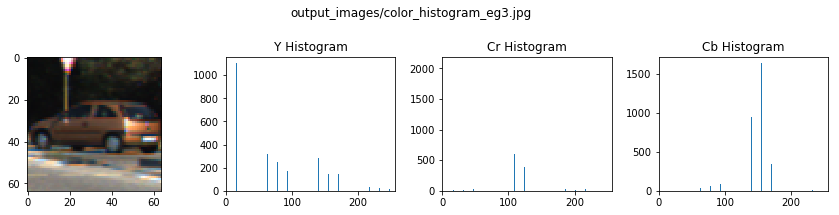

In [117]:
img = cv2.imread('./kitti_gti_dataset/vehicles/KITTI_extracted/4841.png')

# extracting color histogram features and thier bin centers
bincen, hist_features = color_hist(convert_color(img, color_space='YCrCb'), nbins=16)

# Plot a figure with all three bar charts
nfeatures_per_channel = hist_features.shape[0]//3

fig = plt.figure(figsize=(12,3))
plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(142)
plt.bar(bincen, hist_features[0:nfeatures_per_channel])
plt.xlim(0, 256)
plt.title('Y Histogram')
plt.subplot(143)
plt.bar(bincen, hist_features[nfeatures_per_channel:nfeatures_per_channel*2])
plt.xlim(0, 256)
plt.title('Cr Histogram')
plt.subplot(144)
plt.bar(bincen, hist_features[nfeatures_per_channel*2:])
plt.xlim(0, 256)
plt.title('Cb Histogram')
fig.tight_layout()

# save figure
imgpth = 'output_images/color_histogram_eg3.jpg'
plt.suptitle(imgpth)
plt.subplots_adjust(top=0.75)
plt.savefig(imgpth)

### Spatial Binning

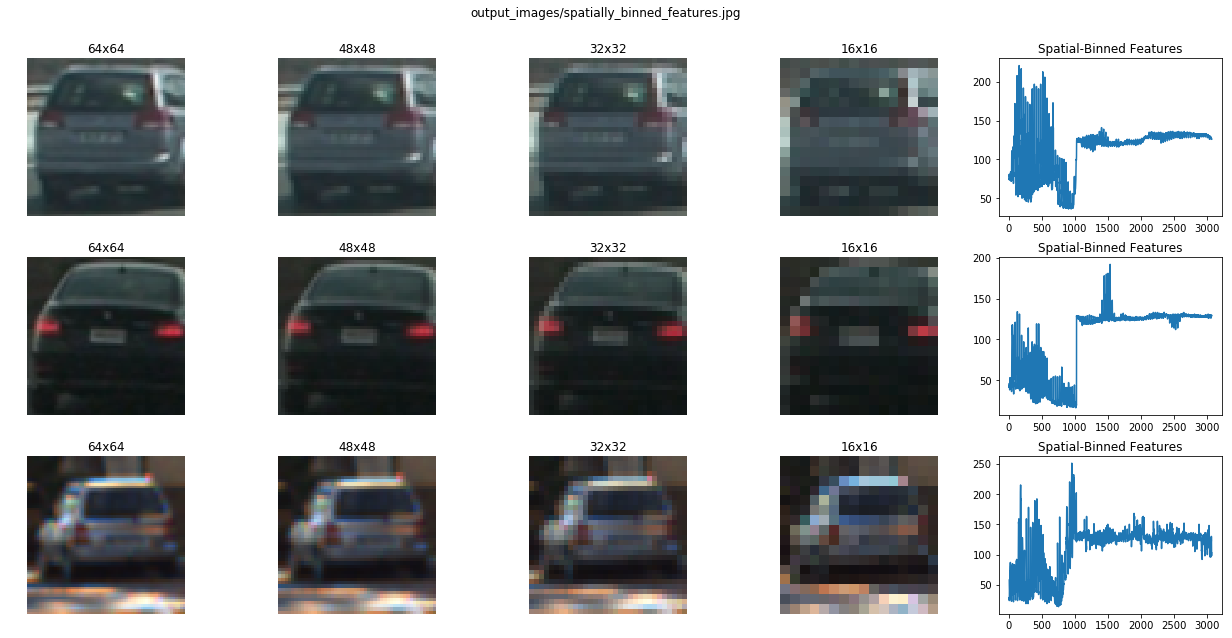

In [3]:
# set up canvas and axes
cols = 5; rows = 3
f, ax = plt.subplots(rows, cols, figsize=(cols*3.5,rows*3))

for i, img_id in enumerate([ './kitti_gti_dataset/vehicles/GTI_Left/image0036.png',
                             './kitti_gti_dataset/vehicles/GTI_MiddleClose/image0334.png',
                             './kitti_gti_dataset/vehicles/KITTI_extracted/1392.png']):
    # print(i, img_id)
    
    # Read a color image
    img = cv2.imread(img_id)
    
    # extract spatial-binning
    feature_vec = bin_spatial(convert_color(img, color_space = 'YCrCb'))

    ax[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i, 0].axis('off')
    ax[i, 0].set_title('64x64')

    ax[i, 1].imshow(cv2.cvtColor(cv2.resize(img, (48,48)), cv2.COLOR_BGR2RGB))
    ax[i, 1].axis('off')
    ax[i, 1].set_title('48x48')

    ax[i, 2].imshow(cv2.cvtColor(cv2.resize(img, (32,32)), cv2.COLOR_BGR2RGB))
    ax[i, 2].axis('off')
    ax[i, 2].set_title('32x32')

    ax[i, 3].imshow(cv2.cvtColor(cv2.resize(img, (16,16)), cv2.COLOR_BGR2RGB))
    ax[i, 3].axis('off')
    ax[i, 3].set_title('16x16')
    
    # Plot features
    ax[i, 4].plot(feature_vec)
    ax[i, 4].set_title('Spatial-Binned Features')
# save figure
imgpth = 'output_images/spatially_binned_features.jpg'
f.suptitle(imgpth)
f.tight_layout()
f.subplots_adjust(top=0.9)
f.savefig(imgpth)

The intuition about spatial binning is about the vehicle brake light.

### Histogram of Oriented Features (HOG)

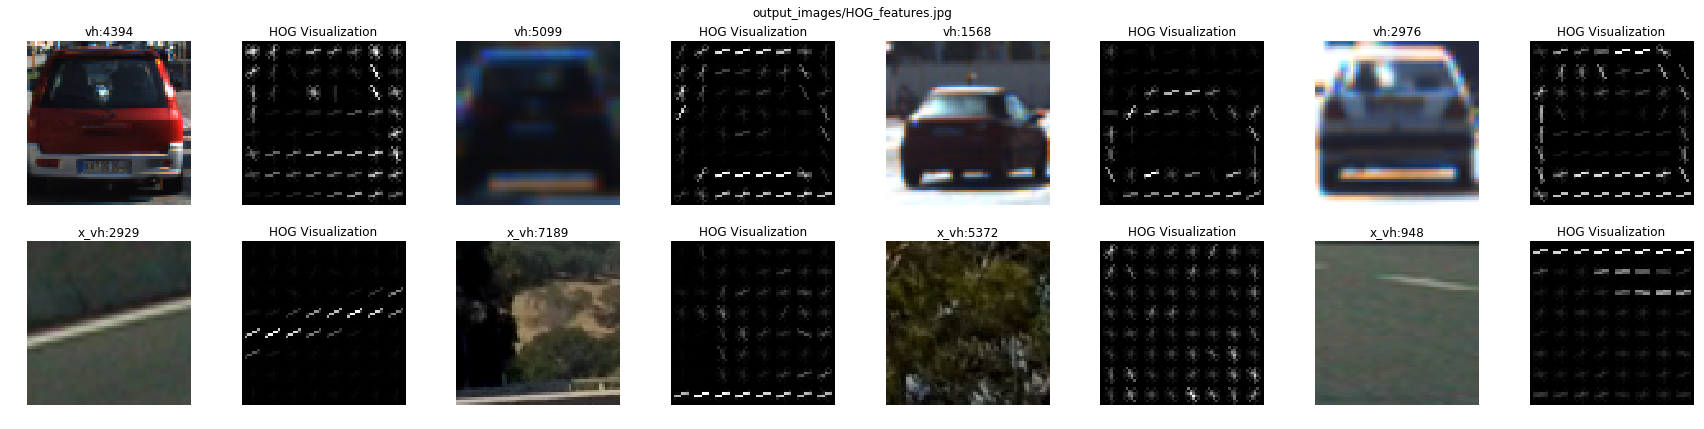

In [274]:
# Generate a random index to look at a car image
vh_indices = np.random.randint(0, len(vh), 4)
x_vh_indices = np.random.randint(0, len(x_vh), 4)

# set up canvas and axes
cols = 8; rows = 2
f, ax = plt.subplots(rows, cols, figsize=(cols*3,rows*3))

# HOG parameters
orient = 9; pix_per_cell = 8; cell_per_block = 2

for i, ind in enumerate(vh_indices):
    img = cv2.imread(vh[ind])
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), orient, 
                                           pix_per_cell, cell_per_block, vis=True)
    
    ax[0,i*2].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0,i*2].set_title('vh:' + str(ind))
    ax[0,i*2].axis('off')
    ax[0,i*2+1].imshow(hog_image, cmap='gray')
    ax[0,i*2+1].set_title('HOG Visualization')
    ax[0,i*2+1].axis('off')

for i, ind in enumerate(x_vh_indices):
    img = cv2.imread(x_vh[ind])
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), orient, 
                                           pix_per_cell, cell_per_block, vis=True)
    
    ax[1,i*2].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[1,i*2].set_title('x_vh:' + str(ind))
    ax[1,i*2].axis('off')
    ax[1,i*2+1].imshow(hog_image, cmap='gray')
    ax[1,i*2+1].set_title('HOG Visualization')
    ax[1,i*2+1].axis('off')
    
# save figure
imgpth = 'output_images/HOG_features.jpg'
f.suptitle(imgpth)
f.tight_layout()
f.subplots_adjust(top=0.9)
f.savefig(imgpth)

## Building a Linear SVM Vehicle Classifier

### Color space search

In [5]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Initialize dataframe to store search results
df = pd.DataFrame()

for color_space in ['RGB','LUV','HSV','YUV','YCrCb']:

    start = time()
    
    # fixed parameters of HOG
    hog_orient=9
    hog_pix_per_cell=8 
    hog_cell_per_block=2
    
    # Feature Extraction
    vh_features = extract_hog_features(vh, color_space,
                                       hog_orient, hog_pix_per_cell, 
                                       hog_cell_per_block)

    x_vh_features = extract_hog_features(x_vh, color_space,
                                         hog_orient, hog_pix_per_cell, 
                                         hog_cell_per_block)

    # Save Features
    kitti_gti_features = {}
    kitti_gti_features['vh_features'] = vh_features
    kitti_gti_features['x_vh_features'] = x_vh_features
    features_filename = "kitti_gti_features_"+ color_space +"_3d.p"
    pickle.dump(kitti_gti_features, open(features_filename,"wb"))
    
    # Combining all features
    X = vh_features + x_vh_features

    # Label binarization
    y = np.ones(len(vh_features), dtype=np.int).tolist() + np.zeros(len(x_vh_features), dtype=np.int).tolist()
        
    # Feature Normalization
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)

    # Stratified K-Fold splitter
    skf_cv = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    
    # Create a Linear Support Vector Classifier
    clf = LinearSVC()
    
    # Fit and scoring with k-fold cv
    kf_score = cross_val_score(clf, scaled_X, y, cv=skf_cv)

    # Create Dict to store parameters
    entry = {'color_space': color_space,
             'acc_fold_0' : kf_score[0],
             'acc_fold_1' : kf_score[1],
             'acc_fold_2' : kf_score[2],
             'acc_mean' : kf_score.mean(),
             'elapsed' : round(time()-start,3)}
    
    # temp dataframe as entry to be inserted to master dataframe
    df_entry = pd.DataFrame.from_dict(entry, orient='index').T.sort_index(axis=1)
    
    print(df_entry)
    
    # add entry to master dataframe for color space search metrics
    df = pd.concat([df,df_entry]).reset_index(drop=True)

df.to_csv('color_space_search.csv', index=False)

  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space  elapsed
0   0.967235   0.965372   0.966211  0.966272         RGB  116.049
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed
0   0.984462   0.986824   0.986484  0.985924         LUV  96.536
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space  elapsed
0   0.985644   0.986149   0.984964  0.985586         HSV  100.611
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed
0   0.986489   0.988682   0.987667  0.987613         YUV   88.97
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed
0   0.986995   0.990541   0.988512  0.988683       YCrCb  97.239


In [280]:
# print out search result
pd.read_csv('color_space_search.csv').sort_values('acc_mean', ascending=False)

acc_fold_0  acc_fold_1  acc_fold_2  acc_mean color_space  elapsed
0      0.9870      0.9905      0.9885    0.9887       YCrCb   97.239
1      0.9865      0.9887      0.9877    0.9876         YUV   88.970
2      0.9845      0.9868      0.9865    0.9859         LUV   96.536
3      0.9856      0.9861      0.9850    0.9856         HSV  100.611
4      0.9672      0.9654      0.9662    0.9663         RGB  116.049

### Search for Optimal parameters of feature extraction

In [3]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Parameters Search Space 
spatial_size_list = [(16,16)]
hist_bin_list = [16,32]
hog_orient_list= [8,9,10,11]

# Initialize dataframe for search result
df = pd.DataFrame()

for spatial_size in spatial_size_list:
    for hist_bins in hist_bin_list:
        for hog_orient in hog_orient_list:
            start = time()
            
            # Set color space to the performing YCrCb 
            color_space = 'YCrCb'

            # Fixed HOG parameters
            hog_pix_per_cell=8 
            hog_cell_per_block=2
            
            # Feature Extractions
            vh_features = extract_features(vh, color_space, 
                                           spatial_size, hist_bins, 
                                           hog_orient, hog_pix_per_cell, 
                                           hog_cell_per_block)

            x_vh_features = extract_features(x_vh, color_space, 
                                             spatial_size, hist_bins, 
                                             hog_orient, hog_pix_per_cell, 
                                             hog_cell_per_block)

            # Serialize the features for later use
            kitti_gti_features = {}
            kitti_gti_features['vh_features'] = vh_features
            kitti_gti_features['x_vh_features'] = x_vh_features
            features_filename = "kitti_gti_features_"+ color_space +"3d_s"+ \
                                str(spatial_size[0])+"_h"+str(hist_bins)+"_ort"+str(hog_orient)+".p"
            pickle.dump(kitti_gti_features, open(features_filename,"wb"))

            # Combining all features
            X = vh_features + x_vh_features

            # Target binarization
            y = np.ones(len(vh_features), dtype=np.int).tolist() + np.zeros(len(x_vh_features), dtype=np.int).tolist()

            # Feature Normalization
            X_scaler = StandardScaler().fit(X)
            scaled_X = X_scaler.transform(X)

            # Stratified K-fold Split
            skf_cv = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
            
            # Define LinearSVC estimator
            clf = LinearSVC(random_state=0)
            
            # Cross Validation Training and Scoring
            kf_score = cross_val_score(clf, scaled_X, y, cv=skf_cv)
            
            # Create Dict to store parameters
            entry = {'color_space': color_space,
                     'spatial_size': spatial_size,
                     'hist_bins': hist_bins,
                     'hog_orient': hog_orient,
                     'acc_fold_0' : kf_score[0],
                     'acc_fold_1' : kf_score[1],
                     'acc_fold_2' : kf_score[2],
                     'acc_mean' : kf_score.mean(),
                     'elapsed' : round(time()-start,3)}

            # temp dataframe as entry to master dataframe
            df_entry = pd.DataFrame.from_dict(entry, orient='index').T.sort_index(axis=1)

            # add entry to master dataframe for color space search metrics
            df = pd.concat([df,df_entry]).reset_index(drop=True)
            
            print(df_entry)

# save search results to csv
df.to_csv('feature_parameter_search.csv', index=False)

  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed hist_bins  \
0   0.992569   0.994932   0.992059  0.993187       YCrCb  92.852        16   

  hog_orient spatial_size  
0          8     (16, 16)  
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed hist_bins  \
0   0.991724   0.994595   0.992735  0.993018       YCrCb  85.619        16   

  hog_orient spatial_size  
0          9     (16, 16)  
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed hist_bins  \
0     0.9924   0.994595   0.992397  0.993131       YCrCb  78.674        16   

  hog_orient spatial_size  
0         10     (16, 16)  
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed hist_bins  \
0   0.992738   0.994932   0.993411  0.993694       YCrCb  88.792        16   

  hog_orient spatial_size  
0         11     (16, 16)  
  acc_fold_0 acc_fold_1 acc_fold_2  acc_mean color_space elapsed hist_bins  \
0     0.9924   0.994595   0.992566  0.993187       YCrCb  94.828      

In [283]:
# print out parameters search results
pd.read_csv('feature_parameter_search.csv').sort_values('acc_mean', ascending=False)

acc_fold_0  acc_fold_1  acc_fold_2  acc_mean color_space  elapsed  \
0      0.9927      0.9946      0.9937    0.9937       YCrCb   81.173   
1      0.9927      0.9949      0.9934    0.9937       YCrCb   88.792   
2      0.9927      0.9946      0.9931    0.9935       YCrCb   79.008   
3      0.9924      0.9946      0.9926    0.9932       YCrCb   94.828   
4      0.9926      0.9949      0.9921    0.9932       YCrCb   92.852   
5      0.9924      0.9946      0.9924    0.9931       YCrCb   78.674   
6      0.9916      0.9944      0.9932    0.9931       YCrCb   87.456   
7      0.9917      0.9946      0.9927    0.9930       YCrCb   85.619   

   hist_bins  hog_orient spatial_size  
0         32          11     (16, 16)  
1         16          11     (16, 16)  
2         32          10     (16, 16)  
3         32           8     (16, 16)  
4         16           8     (16, 16)  
5         16          10     (16, 16)  
6         32           9     (16, 16)  
7         16           9     (16, 16)

### Gridsearch on hyperparameters of LinearSVC

Note: This section is only for experimental. It seems incorrect.

In [2]:
import pickle
features_filename = "kitti_gti_features_YCrCb3d_s16_h32_ort11.p"
kitti_gti_features = pickle.load(open(features_filename,"rb"))
vh_features = kitti_gti_features['vh_features']
x_vh_features = kitti_gti_features['x_vh_features']
color_space = 'YCrCb'
spatial_size = (16,16) 
hist_bins = 32
hog_orient = 11  
hog_pix_per_cell = 8
hog_cell_per_block = 2

In [3]:
# Combining all features
X = vh_features + x_vh_features

# Target binarization
y = np.ones(len(vh_features), dtype=np.int).tolist() + np.zeros(len(x_vh_features), dtype=np.int).tolist()

# Feature Normalization
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

parameters = {'loss':('hinge', 'squared_hinge'), 'C':[0.5, 1, 2, 4, 8, 10]} 

svr = LinearSVC()
clf = GridSearchCV(svr, parameters)
gs = clf.fit(scaled_X, y) 

In [5]:
pd.DataFrame.from_dict(gs.cv_results_)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        2.595312         0.062589         0.983896               1.0     0.5   
1       15.304662         0.060363         0.983896               1.0     0.5   
2        2.483878         0.053497         0.983896               1.0       1   
3        2.507473         0.051811         0.983896               1.0       1   
4        2.313690         0.068800         0.983896               1.0       2   
5        3.303107         0.052187         0.983896               1.0       2   
6        2.357804         0.053880         0.983896               1.0       4   
7        2.305661         0.052443         0.983896               1.0       4   
8        2.314640         0.052470         0.983896               1.0       8   
9        2.413792         0.055283         0.983896               1.0       8   
10       2.325038         0.052491         0.983896               1.0      10   
11       2.392576         0.052401         0.983896               1.0      10   

       param_loss                               params  rank_test_score  \
0           hinge          {'C': 0.5, 'loss': 'hinge'}                1   
1   squared_hinge  {'C': 0.5, 'loss': 'squared_hinge'}                1   
2           hinge            {'C': 1, 'loss': 'hinge'}                1   
3   squared_hinge    {'C': 1, 'loss': 'squared_hinge'}                1   
4           hinge            {'C': 2, 'loss': 'hinge'}                1   
5   squared_hinge    {'C': 2, 'loss': 'squared_hinge'}                1   
6           hinge            {'C': 4, 'loss': 'hinge'}                1   
7   squared_hinge    {'C': 4, 'loss': 'squared_hinge'}                1   
8           hinge            {'C': 8, 'loss': 'hinge'}                1   
9   squared_hinge    {'C': 8, 'loss': 'squared_hinge'}                1   
10          hinge           {'C': 10, 'loss': 'hinge'}                1   
11  squared_hinge   {'C': 10, 'loss': 'squared_hinge'}                1   

    split0_test_score  split0_train_score  split1_test_score  \
0            0.967911                 1.0           0.994932   
1            0.967911                 1.0           0.994932   
2            0.967911                 1.0           0.994932   
3            0.967911                 1.0           0.994932   
4            0.967911                 1.0           0.994932   
5            0.967911                 1.0           0.994932   
6            0.967911                 1.0           0.994932   
7            0.967911                 1.0           0.994932   
8            0.967911                 1.0           0.994932   
9            0.967911                 1.0           0.994932   
10           0.967911                 1.0           0.994932   
11           0.967911                 1.0           0.994932   

    split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0                  1.0           0.988849                 1.0      0.201447   
1                  1.0           0.988849                 1.0      2.775136   
2                  1.0           0.988849                 1.0      0.270415   
3                  1.0           0.988849                 1.0      0.231965   
4                  1.0           0.988849                 1.0      0.141246   
5                  1.0           0.988849                 1.0      0.495454   
6                  1.0           0.988849                 1.0      0.104063   
7                  1.0           0.988849                 1.0      0.170251   
8                  1.0           0.988849                 1.0      0.138801   
9                  1.0           0.988849                 1.0      0.231146   
10                 1.0           0.988849                 1.0      0.139812   
11                 1.0           0.988849                 1.0      0.245400   

    std_score_time  std_test_score  std_train_score  
0         0.010885        0.011574              0.0  
1    

### Training the final SVC

In [3]:
import pickle
start = time()

# Setting Final Parameters for feature extraction
color_space='YCrCb'
spatial_size=(16, 16)
hist_bins=16
hog_orient=11
hog_pix_per_cell=8 
hog_cell_per_block=2

# Feature extraction
vh_features = extract_features(vh, color_space, 
                               spatial_size, hist_bins, 
                               hog_orient, hog_pix_per_cell, 
                               hog_cell_per_block)

x_vh_features = extract_features(x_vh, color_space, 
                                 spatial_size, hist_bins, 
                                 hog_orient, hog_pix_per_cell, 
                                 hog_cell_per_block)

# Combining all features
X = vh_features + x_vh_features

# Serialize the computed features and parameters
kitti_gti_features = {}
kitti_gti_features['vh_features'] = vh_features
kitti_gti_features['x_vh_features'] = x_vh_features
kitti_gti_features['color_space'] = color_space
kitti_gti_features['spatial_size'] = spatial_size
kitti_gti_features['hist_bins'] = hist_bins
kitti_gti_features['hog_orient'] = hog_orient 
kitti_gti_features['hog_pix_per_cell'] = hog_pix_per_cell
kitti_gti_features['hog_cell_per_block'] = hog_cell_per_block

features_filename = "kitti_gti_features_"+ color_space +"3d_s"+ \
                    str(spatial_size[0])+"_h"+str(hist_bins)+"_ort"+str(hog_orient)+".p"

pickle.dump(kitti_gti_features, open(features_filename,"wb"))

print("Features written to ", features_filename)
end = time()
print("Feature Extraction Elapsed:", round((end-start),3))

Features written to  kitti_gti_features_YCrCb3d_s16_h16_ort11.p
Feature Extraction Elapsed: 92.235


In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Combining all features
X = vh_features + x_vh_features

# Label binarization
y = np.ones(len(vh_features), dtype=np.int).tolist() + np.zeros(len(x_vh_features), dtype=np.int).tolist()

# Feature Normalization
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Split dataset into train and test set in 8:2 ratio with stratification
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.8, random_state=42, stratify=y)

start = time()

# Fitting of the final classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# Scoring on test set
pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)
print("Model Accuracy", acc)

end = time()
print("Training Elapsed:",round((end-start),3))

Model Accuracy 0.99169481982
Training Elapsed: 1.112


In [5]:
# Saving the trained model and relevant parameters
vh_clf = {}
vh_clf['classifier'] = clf
vh_clf['scaler'] = X_scaler
vh_clf['color_space'] = color_space
vh_clf['hog_orient'] = hog_orient
vh_clf['hog_pix_per_cell'] = hog_pix_per_cell
vh_clf['hog_cell_per_block'] = hog_cell_per_block
vh_clf['spatial_size'] = spatial_size
vh_clf['hist_bins'] = hist_bins

print(vh_clf['classifier'], vh_clf['scaler'], 
      vh_clf['color_space'], vh_clf['hog_orient'],
      vh_clf['hog_pix_per_cell'], vh_clf['hog_cell_per_block'],
      vh_clf['spatial_size'], vh_clf['hist_bins'])

clf_filename = "kitti_gti_classifier_" + color_space + "_s" + \
                str(spatial_size[0]) + "_h" + str(hist_bins) + \
                "_ort" + str(hog_orient) + ".p"

print(clf_filename)

pickle.dump(vh_clf, open(clf_filename,"wb"))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) StandardScaler(copy=True, with_mean=True, with_std=True) YCrCb 11 8 2 (16, 16) 16
kitti_gti_classifier_YCrCb_s16_h16_ort11.p


### Inference

In [1]:
from helper_functions import *
from time import time
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# grab list of files for positive and negative class
vh = glob.glob("./kitti_gti_dataset/vehicles/*/*.png")
x_vh = glob.glob("./kitti_gti_dataset/non-vehicles/*/*.png")

In [2]:
# Extract parameters from the saved trained models
import pickle
clf_filename = "kitti_gti_classifier_YCrCb_s16_h16_ort11.p"
vh_clf = pickle.load(open(clf_filename,"rb"))
clf = vh_clf['classifier']
X_scaler = vh_clf["scaler"]
color_space = vh_clf['color_space']
hog_orient = vh_clf["hog_orient"]
hog_pix_per_cell = vh_clf["hog_pix_per_cell"]
hog_cell_per_block = vh_clf["hog_cell_per_block"]
spatial_size = vh_clf["spatial_size"]
hist_bins = vh_clf["hist_bins"]

#### Quick test of models on various thumbnails

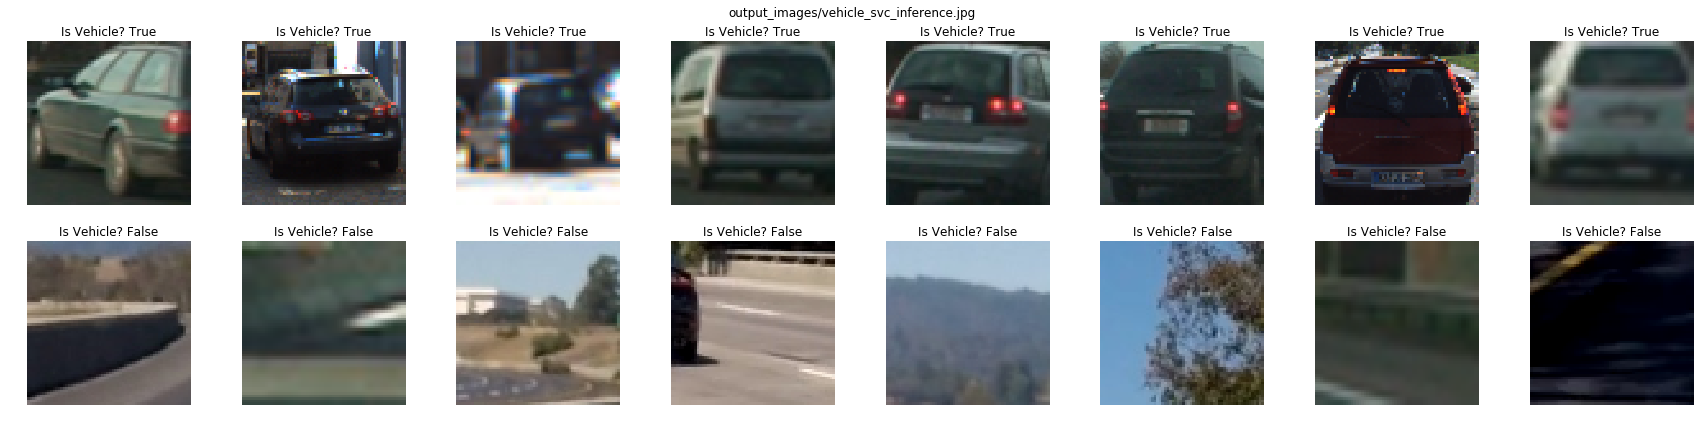

In [3]:
# Generate a random index to look at a car image
vh_test = np.random.choice(vh, 8)
x_vh_test = np.random.choice(x_vh, 8)

# set up canvas and axes
cols = 8; rows = 2
f, ax = plt.subplots(rows, cols, figsize=(cols*3,rows*3))

# Feature extraction
fv = extract_features(vh_test, color_space, 
                      spatial_size, hist_bins, 
                      hog_orient, hog_pix_per_cell, 
                      hog_cell_per_block)

# Apply feature normalization
test_features = X_scaler.transform(fv)   

# Prediction
test_prediction = clf.predict(test_features)

for i, filename in enumerate(vh_test):
    img = cv2.imread(filename)
    ax[0,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0,i].set_title('Is Vehicle? ' + str(bool(test_prediction[i])))
    ax[0,i].axis('off')

# Feature extraction
fv = extract_features(x_vh_test, color_space, 
                      spatial_size, hist_bins, 
                      hog_orient, hog_pix_per_cell, 
                      hog_cell_per_block)

# Apply feature normalization
test_features = X_scaler.transform(fv)

# Prediction
test_prediction = clf.predict(test_features)

for i, filename in enumerate(x_vh_test):
    img = cv2.imread(filename)
    ax[1,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[1,i].set_title('Is Vehicle? ' + str(bool(test_prediction[i])))
    ax[1,i].axis('off')

# save figure
imgpth = 'output_images/vehicle_svc_inference.jpg'
f.suptitle(imgpth)
f.tight_layout()
f.subplots_adjust(top=0.9)
f.savefig(imgpth)

## Sliding Window Search

```plot_slide_window``` is created to visualize sliding window for tuning scale on region of interest.

In [4]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def plot_slide_window(img, ystart, ystop, xstart, xstop, scale, color_space,
                           hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2, 
                           spatial_size=(16,16), hist_bins=16):

    # hog_orient=9; hog_pix_per_cell=8; hog_cell_per_block=2

    draw_img = np.copy(img)
    img = img.astype(np.float32)/255

    img_search_area = convert_color(img[ystart:ystop,xstart:xstop], color_space=color_space)

    if scale != 1:
        imshape = img_search_area.shape
        img_search_area = cv2.resize(img_search_area, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

    ch1 = img_search_area[:,:,0]
    ch2 = img_search_area[:,:,1]
    ch3 = img_search_area[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // hog_pix_per_cell) - hog_cell_per_block + 1
    nyblocks = (ch1.shape[0] // hog_pix_per_cell) - hog_cell_per_block + 1 
    nfeat_per_block = hog_orient * hog_cell_per_block**2

    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // hog_pix_per_cell) - hog_cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

    on_windows = []
    
    for xb in range(nxsteps+1):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
    
            xleft = xpos*hog_pix_per_cell
            ytop = ypos*hog_pix_per_cell

            xbox_left = np.int(xleft*scale)
            ytop_draw = np.int(ytop*scale)
            win_draw = np.int(window*scale)

            detection_win = ((xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart))
            cv2.rectangle(draw_img, detection_win[0], detection_win[1],(0,0,255),6)

            on_windows.append(detection_win)
                
    return on_windows

#### Final Scale and ROI of Sliding Window Search

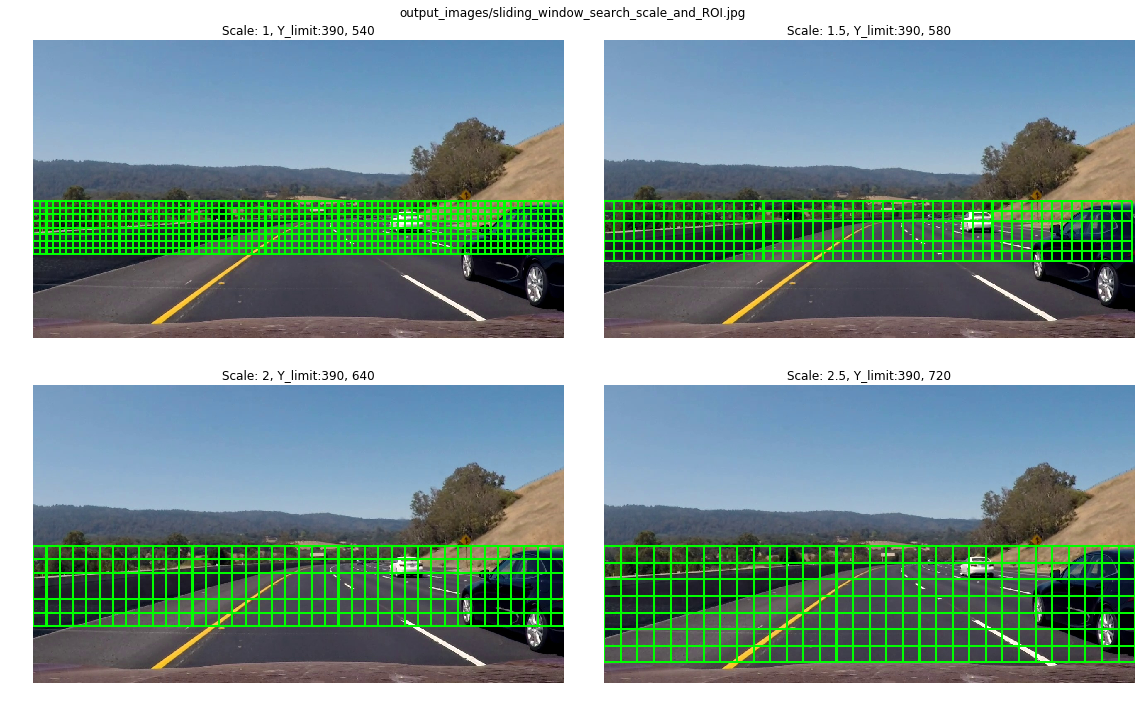

In [5]:
search_scale = [(1  , 390, 540, 0, 1280),
                (1.5, 390, 580, 0, 1280),
                (2  , 390, 640, 0, 1280),
                (2.5, 390, 720, 0, 1280)]

img = cv2.imread('./project_video_imgs/project_video_frame00710.jpg')

f, ax = plt.subplots(len(search_scale)//2, 2, figsize=(16,10))

for i, (scale, ystart, ystop, xstart, xstop) in enumerate(search_scale):
    _img = img.copy()
    windows_list = plot_slide_window(_img, ystart, ystop, xstart, xstop, scale, "RGB",
                                     hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2, 
                                     spatial_size=(16,16), hist_bins=16)

    window_img = draw_boxes(_img, windows_list, color=(0, 255, 0), thick=3)

    ax[i//2, i%2].imshow(convert_color(window_img,"RGB"))
    ax[i//2, i%2].axis('off')
    ax[i//2, i%2].set_title("Scale: " + str(scale) + ", Y_limit:" + str(ystart) + ", " + str(ystop))
    
# save figure
imgpth = 'output_images/sliding_window_search_scale_and_ROI.jpg'
f.suptitle(imgpth)
f.tight_layout()
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

```slide_extract_classify``` is a function to slide through the input image on the specified ROI, then extract features for each window and subsequently predict if it is a window of vehicle. In contrast to color histogram and spatial-binned features, HOG features is only computed once per ROI. HOG of subwindow candidates is resized and subsampled from the cache values to avoid recomputation of the overlapped HOG region. Finally, the function returns a list of bboxes of the vehicle windows. 

In [6]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def slide_extract_classify(img, ystart, ystop, scale, color_space,
                           svc, X_scaler, 
                           hog_orient, hog_pix_per_cell, hog_cell_per_block, 
                           spatial_size, hist_bins):

    draw_img = np.copy(img)
    img = img.astype(np.float32)/255

    img_search_area = convert_color(img[ystart:ystop,:,:], color_space=color_space)

    if scale != 1:
        imshape = img_search_area.shape
        img_search_area = cv2.resize(img_search_area, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

    ch1 = img_search_area[:,:,0]
    ch2 = img_search_area[:,:,1]
    ch3 = img_search_area[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // hog_pix_per_cell) - hog_cell_per_block + 1
    nyblocks = (ch1.shape[0] // hog_pix_per_cell) - hog_cell_per_block + 1 
    nfeat_per_block = hog_orient * hog_cell_per_block**2

    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // hog_pix_per_cell) - hog_cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, hog_orient, hog_pix_per_cell, hog_cell_per_block, fv=False, vis=False)
    hog2 = get_hog_features(ch2, hog_orient, hog_pix_per_cell, hog_cell_per_block, fv=False, vis=False)
    hog3 = get_hog_features(ch3, hog_orient, hog_pix_per_cell, hog_cell_per_block, fv=False, vis=False)

    on_windows = []
    
    for xb in range(nxsteps+1):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step

            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*hog_pix_per_cell
            ytop = ypos*hog_pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(img_search_area[ytop:ytop+window, xleft:xleft+window], (64,64))

            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            bincen, hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    

            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                
                # output final detected windows
                detected_win = ((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart))
                cv2.rectangle(draw_img, detected_win[0], detected_win[1],(0,0,255),6)
                
                on_windows.append(detected_win)
                
    return on_windows

#### Sliding Window Search on test images

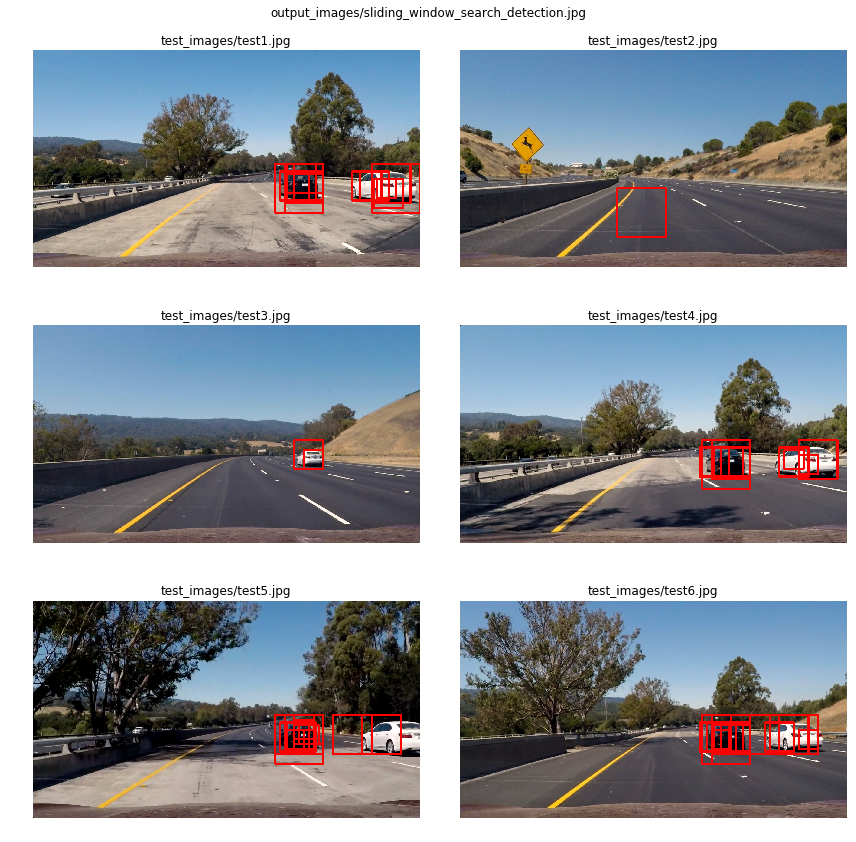

In [7]:
imglist = sorted(glob.glob('test_images/*.jpg'))

rows = len(imglist)//2; cols = 2

f, ax = plt.subplots(rows, cols, figsize=(12,12))

for i, filename in enumerate(imglist):
    img = cv2.imread(filename)

    windows_list = []

    # list element (scale, ystart, ystop)
    search_scale = [(1.0, 380, 540),
                    (1.5, 380, 580),
                    (2.0, 380, 640),
                    (2.5, 380, 720)]
    
    for scale, ystart, ystop in search_scale:
        windows_list.extend(slide_extract_classify(img, ystart, ystop, scale, color_space,
                                                   clf, X_scaler, 
                                                   hog_orient, hog_pix_per_cell, hog_cell_per_block, 
                                                   spatial_size, hist_bins))
        
    window_img = draw_boxes(img, windows_list, color=(0, 0, 255), thick=6)

    r = int(i/cols); c=i%cols
    ax[r,c].imshow(cv2.cvtColor(window_img,cv2.COLOR_BGR2RGB))
    ax[r,c].axis('off')
    ax[r,c].set_title(filename)
    
# save figure
imgpth = 'output_images/sliding_window_search_detection.jpg'
f.suptitle(imgpth)
f.tight_layout()
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

## Overcoming False Positives and Duplicate Detections

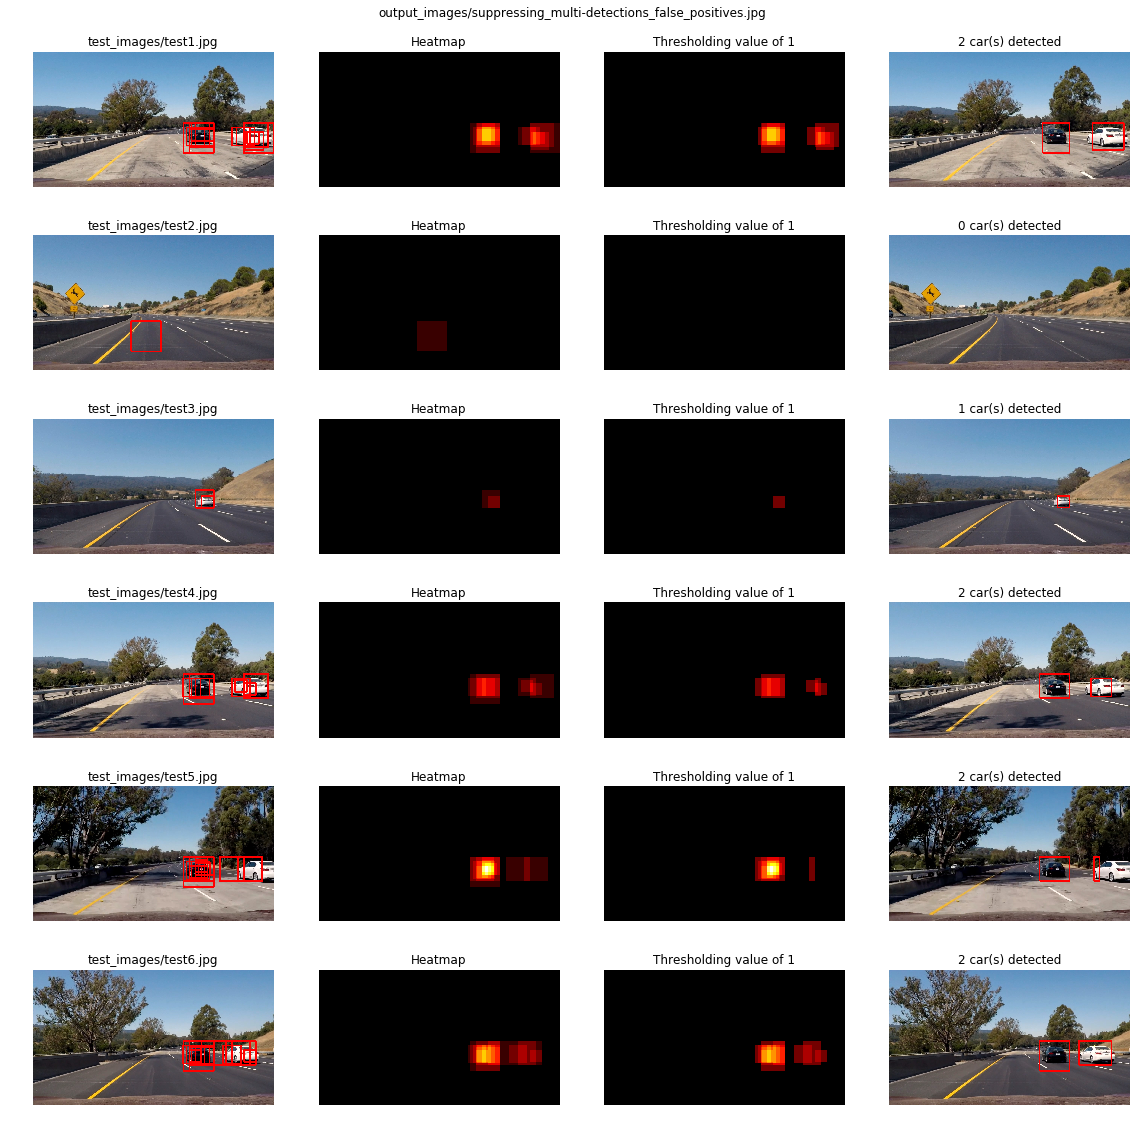

In [8]:
imglist = sorted(glob.glob('test_images/*.jpg'))

rows = len(imglist); cols = 4

f, ax = plt.subplots(rows, cols, figsize=(16, 16))

for i, filename in enumerate(imglist):
    img = cv2.imread(filename)

    windows_list = []

    # list element (scale, ystart, ystop)
    search_scale = [(1.0, 380, 540),
                    (1.5, 380, 580),
                    (2.0, 380, 640),
                    (2.5, 380, 720)]
    
    # Sliding window search
    for scale, ystart, ystop in search_scale:
        windows_list.extend(slide_extract_classify(img, ystart, ystop, scale, color_space,
                                                   clf, X_scaler, 
                                                   hog_orient, hog_pix_per_cell, hog_cell_per_block, 
                                                   spatial_size, hist_bins))
    # Draw detected window
    window_img = draw_boxes(img, windows_list, color=(0, 0, 255), thick=6)
        
    # Read in a pickle file with bboxes saved
    # Each item in the "all_bboxes" list will contain a 
    # list of boxes for one of the images shown above
    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,windows_list)
    heatmap = np.clip(heat, 0, 255)

    # Apply threshold to help remove false positives
    heat_thres = apply_threshold(heat, 1)

    # Visualize the heatmap when displaying    
    heatmap_thres = np.clip(heat_thres, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap_thres)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    ax[i,0].imshow(cv2.cvtColor(window_img,cv2.COLOR_BGR2RGB))
    ax[i,0].axis('off')
    ax[i,0].set_title(filename)
        
    ax[i,1].imshow(cv2.cvtColor(cv2.applyColorMap(heatmap.astype('uint8')*23, 
                                                  cv2.COLORMAP_HOT),
                                cv2.COLOR_BGR2RGB))
    ax[i,1].axis('off')
    ax[i,1].set_title("Heatmap")
        
    ax[i,2].imshow(cv2.cvtColor(cv2.applyColorMap(heatmap_thres.astype('uint8')*23, 
                                                  cv2.COLORMAP_HOT),
                                cv2.COLOR_BGR2RGB))
    ax[i,2].axis('off')
    ax[i,2].set_title("Thresholding value of 1")
        
    ax[i,3].imshow(cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB))
    ax[i,3].axis('off')
    ax[i,3].set_title(str(labels[1]) +" car(s) detected")
    
# save figure
imgpth = 'output_images/suppressing_multi-detections_false_positives.jpg'
f.suptitle(imgpth)
f.tight_layout()
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

Single Image Test with diagnostic view

2
0.447
9
0.239
15
0.187
17
0.168
0.036


(-0.5, 1706.5, 719.5, -0.5)

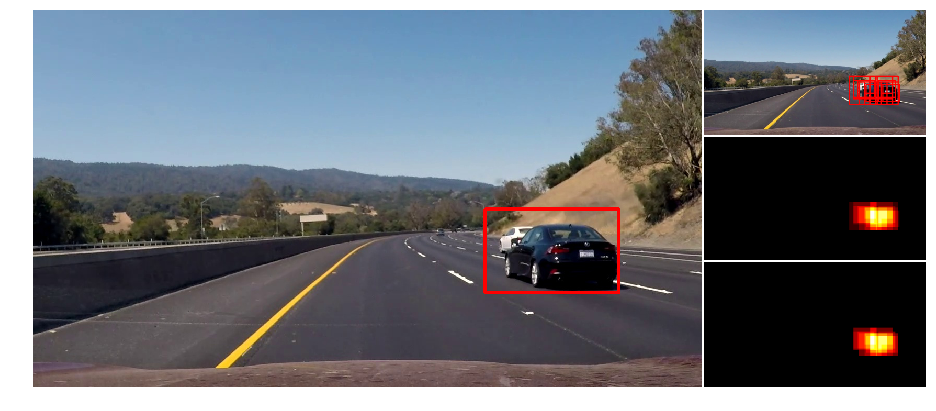

In [9]:
# img = cv2.imread('./project_video_imgs/project_video_frame00404.jpg')

img = cv2.imread('./project_video_imgs/project_video_frame00799.jpg')

windows_list = []

search_scale = [(1.0, 380, 540),
                (1.5, 380, 580),
                (2.0, 380, 640),
                (2.5, 380, 720)]

for i, (scale, ystart, ystop) in enumerate(search_scale):
    loop_start = time()
    windows_list.extend(slide_extract_classify(img, ystart, ystop, scale, color_space,
                                     clf, X_scaler, 
                                     hog_orient, hog_pix_per_cell, hog_cell_per_block, 
                                     spatial_size, hist_bins))
    print(len(windows_list))
    loop_end = time()
    print(round(loop_end-loop_start,3))

post_start = time()

window_img = draw_boxes(img, windows_list, color=(0, 0, 255), thick=6)

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
heat = np.zeros_like(img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,windows_list)
heatmap = np.clip(heat, 0, 255)
    
# Apply threshold to help remove false positives
heat_thres = apply_threshold(heat, 1)

# Visualize the heatmap when displaying    
heatmap_thres = np.clip(heat_thres, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap_thres)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

if heatmap.max() == 0:
    hotscale = 255
else:
    hotscale = int(255//heatmap.max())
    
# Create a collage of images as a single frame for final video
collage = np.zeros([720,1280+427,3],dtype='uint8')
collage[0:720,0:1280,:] = draw_img
collage[0:240,1280:,:] = cv2.resize(window_img, (427, 240), 
                                    interpolation=cv2.INTER_AREA)
collage[240:480,1280:,:] = cv2.resize(cv2.applyColorMap(heatmap.astype('uint8')*hotscale, cv2.COLORMAP_HOT)
                                      , (427, 240), interpolation=cv2.INTER_AREA)
collage[480:,1280:,:] = cv2.resize(cv2.applyColorMap(heatmap_thres.astype('uint8')*hotscale, cv2.COLORMAP_HOT)
                                      , (427, 240), interpolation=cv2.INTER_AREA)

collage[:,1278:1282,:]=255
collage[238:242,1280:,:]=255
collage[478:482,1280:,:]=255

print(round(time()-post_start,3))
plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(collage, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Video Pipeline

In [10]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from tqdm import tqdm # progress bar

In [11]:
def process_imgs(srcdir, dstdir):
    raw_imgs= sorted(glob.glob(srcdir + '/*.jpg'))
    
    if not os.path.exists(dstdir):
        os.makedirs(dstdir)
    
    # List variable to store historical heatmap
    heatmap_history = []
    
    # Number of historical heatmap to store
    nhis = 5
    
    for i in tqdm(range(0, len(raw_imgs))):
        img = cv2.imread(raw_imgs[i])

        windows_list = []
        
        # Search ROI and Scale
        search_scale = [(1.0, 390, 500),
                        (1.5, 390, 580),
                        (2.0, 390, 640),
                        (2.5, 390, 720)]
        
        # Sliding Window Search
        for j, (scale, ystart, ystop) in enumerate(search_scale):
            windows_list.extend(slide_extract_classify(img, ystart, ystop, scale, color_space,
                                             clf, X_scaler, 
                                             hog_orient, hog_pix_per_cell, hog_cell_per_block, 
                                             spatial_size, hist_bins))
            
        # Create an image with raw detected windows
        window_img = draw_boxes(img, windows_list, color=(0, 0, 255), thick=6)
            
        # Initialize heapmap of current frame
        curr_heat = np.zeros_like(img[:,:,0]).astype(np.float)
        
        # Add heat to each box in box list
        curr_heat = add_heat(curr_heat,windows_list)
        curr_heatmap = np.clip(curr_heat, 0, 255)
        
        # Apply thresholding to current heatmap to suppress false positives
        curr_heatthres = apply_threshold(curr_heatmap, 1)
        curr_heatthres_map = np.clip(curr_heatthres, 0, 255)
        
        # Discard oldest historical heatmap in the buffer
        if len(heatmap_history) >= nhis:
            heatmap_history.pop(0)
        
        # Append current thresholded heatmap to history list
        heatmap_history.append(curr_heatthres)
        
        # Sum up all the heatmap in the history list
        heathis_sum = np.sum(heatmap_history, axis=0)
        heathis_sum_map = np.clip(heathis_sum, 0, 255)

        # Apply thresholding on consolidated historical heatmap
        if len(heatmap_history) <= nhis//2:
            heathis_thres = apply_threshold(heathis_sum, 1)
        else:
            heathis_thres = apply_threshold(heathis_sum, 3)

        # Visualize the heatmap when displaying    
        heathis_thres_map = np.clip(heathis_thres, 0, 255)

        # Find final boxes from thresholded heatmap using label function
        labels = label(heathis_thres_map)
        draw_img = draw_labeled_bboxes(np.copy(img), labels)

        # heatmap scale multiplier
        if heathis_sum_map.max() == 0:
            hotscale = 255
        else:
            hotscale = int(255//heathis_sum_map.max())
            
        # Create a collage of images as a single frame for final video
        collage = np.zeros([720,1280+427,3],dtype='uint8')
        collage[0:720,0:1280,:] = draw_img
        collage[0:240,1280:,:] = cv2.resize(window_img, (427, 240), 
                                            interpolation=cv2.INTER_AREA)
        collage[240:480,1280:,:] = cv2.resize(cv2.applyColorMap(curr_heatthres_map.astype('uint8')*hotscale, 
                                                                cv2.COLORMAP_HOT), 
                                              (427, 240), interpolation=cv2.INTER_AREA)
        collage[480:,1280:,:] = cv2.resize(cv2.applyColorMap(heathis_sum_map.astype('uint8')*hotscale, 
                                                             cv2.COLORMAP_HOT), 
                                           (427, 240), interpolation=cv2.INTER_AREA)
        # divider
        collage[:,1278:1282,:]=255
        collage[238:242,1280:,:]=255
        collage[478:482,1280:,:]=255
        cv2.imwrite(dstdir + "/" + os.path.basename(raw_imgs[i]), collage)

    # Compile video
    clip = ImageSequenceClip(dstdir, fps=25)
    clip.write_videofile(dstdir + '.mp4')

In [12]:
process_imgs('./test_video_imgs/', 'final_test_video')

                                                                     
MoviePy: building video file final_test_video.mp4
----------------------------------------

Writing video into final_test_video.mp4
Done writing video in final_test_video.mp4 !                         
Your video is ready !


In [13]:
process_imgs('./project_video_imgs/', 'final_project_video')

                                                                         
MoviePy: building video file final_project_video.mp4
----------------------------------------

Writing video into final_project_video.mp4
Done writing video in final_project_video.mp4 !                          
Your video is ready !


### Joint Vehicle and Lane Detection

In [11]:
from lane_detection_functions import *

In [35]:
def process_imgs(srcdir, dstdir):
    raw_imgs= sorted(glob.glob(srcdir + '/*.jpg'))
    
    if not os.path.exists(dstdir):
        os.makedirs(dstdir)
    
    # the number of historical fit to be stored
    smoothing_factor = 12
    
    # the number of consecutive drop threshold to initiate new search
    window_reset_threshold = 3

    # change threshold to reject a fitting
    linear_coeff_threshold = 0.3
    
    # Instantiate line object for left and right line
    left_line = Line()
    right_line = Line()
 
    # List variable to store historical heatmap
    heatmap_history = []
    
    # Number of historical heatmap to store
    nhis = 5

    for i in tqdm(range(0, len(raw_imgs))):
        # Read in frame
        #image = plt.imread(raw_imgs[i])
        undist = plt.imread(raw_imgs[i])        
        
        # Apply distortion correction
        # undist = cv2.undistort(image, mtx, dist, None, mtx)
        
        # Input for vehicle detection
        img = cv2.cvtColor(np.copy(undist), cv2.COLOR_RGB2BGR)
        
        #### Vehicle Detection #####
        
        windows_list = []
        
        # Search
        search_scale = [(1.0, 390, 500),
                        (1.5, 390, 580),
                        (2.0, 390, 640),
                        (2.5, 390, 720)]
        
        # Sliding Window Search
        for j, (scale, ystart, ystop) in enumerate(search_scale):
            windows_list.extend(slide_extract_classify(img, ystart, ystop, scale, color_space,
                                             clf, X_scaler, 
                                             hog_orient, hog_pix_per_cell, hog_cell_per_block, 
                                             spatial_size, hist_bins))
            
        # Create an image with raw detected windows
        window_img = draw_boxes(img, windows_list, color=(0, 0, 255), thick=6)
            
        # Initialize heapmap of current frame
        curr_heat = np.zeros_like(img[:,:,0]).astype(np.float)
        
        # Add heat to each box in box list
        curr_heat = add_heat(curr_heat,windows_list)
        curr_heatmap = np.clip(curr_heat, 0, 255)
        
        # Apply thresholding to current heatmap to suppress false positives
        curr_heatthres = apply_threshold(curr_heatmap, 1)
        curr_heatthres_map = np.clip(curr_heatthres, 0, 255)
        
        # Discard oldest historical heatmap in the buffer
        if len(heatmap_history) >= nhis:
            heatmap_history.pop(0)
        
        # Append current thresholded heatmap to history list
        heatmap_history.append(curr_heatthres)
        
        # Sum up all the heatmap in the history list
        heathis_sum = np.sum(heatmap_history, axis=0)
        heathis_sum_map = np.clip(heathis_sum, 0, 255)

        # Apply thresholding on consolidated historical heatmap
        if len(heatmap_history) <= nhis//2:
            heathis_thres = apply_threshold(heathis_sum, 1)
        else:
            heathis_thres = apply_threshold(heathis_sum, 3)

        # Visualize the heatmap when displaying    
        heathis_thres_map = np.clip(heathis_thres, 0, 255)

        # Find final boxes from thresholded heatmap using label function
        labels = label(heathis_thres_map)
#         draw_img = draw_labeled_bboxes(np.copy(img), labels)

        # heatmap scale multiplier
        if heathis_sum_map.max() == 0:
            hotscale = 255
        else:
            hotscale = int(255//heathis_sum_map.max())
        
        #### Lane Detection ####
        
        # Apply color space transform and thresholding
        combined_binary = mask_color(undist)

        # Perspective tranform to aerial view
        warped = transform_aerial_view(undist)
        binary_warped = transform_aerial_view(combined_binary)

        # Lane Detection and fitting
        left_line.current_fit, right_line.current_fit, left_line.allxy, right_line.allxy = \
            detect_and_fit_lane(binary_warped, left_line.best_fit, right_line.best_fit)

        # Sanity Check
        #--------------
        # Compute the difference between the current fit coeff and the best fit coeff
        if i > 0:   
            left_line.diffs = left_line.current_fit - left_line.best_fit
            right_line.diffs = right_line.current_fit - right_line.best_fit
        
        # Drop the current fit and use the previous fit coeef 
        # if the linear coeff is over a specified threshold
        # otherwise, current fit is good to go
        # the number of consecutive drop is recorded
        if np.absolute(left_line.diffs[1]) > linear_coeff_threshold:
            left_line.current_fit = left_line.previous_fits[-1]
            if left_line.detected == False:
                left_line.drop_count += 1
            left_line.detected = False
        else:
            left_line.detected = True
            left_line.drop_count = 0
            
        if np.absolute(right_line.diffs[1]) > linear_coeff_threshold:
            right_line.current_fit = right_line.previous_fits[-1]
            if right_line.detected == False:
                right_line.drop_count += 1
            right_line.detected = False
        else:
            right_line.detected = True
            right_line.drop_count = 0
        
        # When a consecutive of drop has reached the specified threshold
        # a complete new sliding window search is executed.
        if (left_line.drop_count >= window_reset_threshold) | \
           (right_line.drop_count >= window_reset_threshold):
            # reset the drop count
            left_line.drop_count = 0
            right_line.drop_count = 0
            
            # New window search
            left_line.current_fit, right_line.current_fit, left_temp, right_temp = \
                detect_and_fit_lane(binary_warped, None, None)
            
            # There are chances new window search are not usable,
            # previous fit is used instead
            if (left_line.current_fit is None):
                left_line.current_fit = left_line.previous_fits[-1]
            else:
                left_line.allxy = left_temp
                
            if (right_line.current_fit is None):
                right_line.current_fit = right_line.previous_fits[-1]
            else:
                right_line.allxy = right_temp
                
            left_line.detected = True
            right_line.detected = True
            
            # Clear all the historical fit since a new fit is used
            left_line.previous_fits = []
            right_line.previous_fits = []

        # Discard the first element of the history list to 
        # to make room for recent fit coeff.
        if len(left_line.previous_fits) == smoothing_factor:
            left_line.previous_fits.pop(0)
            right_line.previous_fits.pop(0)
        
        # Append recent fit coeff. to the history list
        left_line.previous_fits.append(left_line.current_fit)
        right_line.previous_fits.append(right_line.current_fit)        
        
        # Smooth out the coeff. averaging all the value in history list
        if len(left_line.previous_fits) == 1:
            left_line.best_fit = left_line.previous_fits[0]
            right_line.best_fit = right_line.previous_fits[0]
        else:
            left_line.best_fit = np.vstack(left_line.previous_fits).mean(axis=0)
            right_line.best_fit = np.vstack(right_line.previous_fits).mean(axis=0)
        
        # Get bird-eye view with marked lane
        marked = mark_lane(binary_warped, 
                           left_line.best_fit, right_line.best_fit, 
                           left_line.allxy, right_line.allxy,
                           left_line.detected, right_line.detected)
        
        # Print best fit coeff.
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(marked,'L-fit: ' + str(np.round(left_line.best_fit,3).astype(str)), 
                    (50,100), font,1 ,(255,255,255), 2 , cv2.LINE_AA)
        cv2.putText(marked,'R-fit: ' + str(np.round(right_line.best_fit,3).astype(str)), 
                    (690,100), font,1 ,(255,255,255), 2 , cv2.LINE_AA)

        # Overlay detected lane on perspective image
        lane_warped = transform_single_point_perspective(undist, 
                                                         left_line.current_fit, right_line.current_fit, 
                                                         left_line.allxy, right_line.allxy)

        # Compute lane curvature and vehicle offset
        left_line.radius, right_line.radius, vehicle_pos = \
                        compute_lane_curvature(left_line.current_fit, right_line.current_fit)
        
        # Print radius for left and right line
        cv2.putText(lane_warped,'Left Curv. : ' + str(int(left_line.radius)) + \
                    ' | Right Curv. : ' + str(int(right_line.radius)), 
                    (80,100), font, 1.5 ,(230, 255, 122), 3, cv2.LINE_AA)

        # Print vehicle relative position to lane center
        if vehicle_pos < 0:
            cv2.putText(lane_warped,'Vehicle is left of ' + str(np.round(np.absolute(vehicle_pos),3)) + \
                        'm lane center.', (80,160), font, 1.5 ,(230, 255, 122), 3, cv2.LINE_AA)
        else:
            cv2.putText(lane_warped,'Vehicle is right of ' + str(np.round(np.absolute(vehicle_pos),3)) + \
                        'm lane center.', (80,160), font, 1.5 ,(230, 255, 122), 3, cv2.LINE_AA)
      
        # Create a collage of images as a single frame for final video
        collage = np.zeros([720,1280+427,3],dtype='uint8')
        collage[0:720,  0:1280,:] = draw_labeled_bboxes(np.copy(lane_warped), labels)
        
        collage[0:240,   1280:,:] = cv2.cvtColor(cv2.resize(window_img, (427, 240), 
                                                            interpolation=cv2.INTER_AREA),
                                                 cv2.COLOR_BGR2RGB)
        
        collage[240:480, 1280:,:] = cv2.cvtColor(cv2.resize(cv2.applyColorMap(heathis_sum_map.astype('uint8')*hotscale, 
                                                                              cv2.COLORMAP_HOT), 
                                                            (427, 240), interpolation=cv2.INTER_AREA), 
                                                 cv2.COLOR_BGR2RGB)
                                                 
        collage[480:720, 1280:,:] = cv2.resize(marked, (427, 240), interpolation=cv2.INTER_AREA)
        
        plt.imsave(dstdir + "/" + os.path.basename(raw_imgs[i]), collage, format="jpeg")
    
    # Compile video
    clip = ImageSequenceClip(dstdir, fps=25)
    clip.write_videofile(dstdir + '.mp4')

In [36]:
process_imgs('./project_video_imgs/', 'joint_vehicle_lane_detection')

                                                                         
MoviePy: building video file joint_vehicle_lane_detection.mp4
----------------------------------------

Writing video into joint_vehicle_lane_detection.mp4
Done writing video in joint_vehicle_lane_detection.mp4 !                 
Your video is ready !
